# ref

[python-data-analysis data](https://github.com/yoonkt200/python-data-analysis/blob/master/data/picher_stats_2017.csv)

[Data Source](http://www.statiz.co.kr/)

# import

In [2]:
library(MASS) #lm.ridge 
library(car) #vif
library(caret) #예측
library(ggplot2)
library(glmnet) #Ridge, Lasso
library(tidyverse)

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-7

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()
✖ tidyr::unpack() masks Matrix::unpack()



In [3]:
get_high_vif_variables <- function(data, threshold) {
  vif_values <- vif(data)
  high_vif_variables <- names(vif_values[vif_values > threshold])
  return(high_vif_variables)
}

# 데이터셋

In [4]:
picher <- read.csv("~/Dropbox/coco/posts/Applied statistics/picher_stats_2017.csv")
head(picher)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,⋯,홈런.9,BABIP,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2018.,연봉.2017.
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,켈리,SK,16,7,0,0,0,30,30,190.0,⋯,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
2,소사,LG,11,11,1,0,0,30,29,185.1,⋯,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
3,양현종,KIA,20,6,0,0,0,31,31,193.1,⋯,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
4,차우찬,LG,10,7,0,0,0,28,28,175.2,⋯,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
5,레일리,롯데,13,7,0,0,0,30,30,187.1,⋯,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
6,피어밴드,KT,8,10,0,0,0,26,26,160.0,⋯,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000


In [5]:
dt2018 <- data.frame(new_col = picher$연봉.2018.)

In [6]:
dt2017 <- data.frame(new_col = picher$연봉.2017.)

In [7]:
dt <- subset(picher, select = -c(연봉.2017.,연봉.2018.))

In [8]:
head(dt)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진.9,볼넷.9,홈런.9,BABIP,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62
2,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08
3,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64
4,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63
5,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38
6,피어밴드,KT,8,10,0,0,0,26,26,160.0,7.42,1.74,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94


In [9]:
dt <- cbind(dt, new_col = dt2017)
names(dt)[length(names(dt))] <- "연봉.2017."


In [10]:
dt <- cbind(dt, new_col = dt2018)
names(dt)[length(names(dt))] <- "연봉.2018."


In [11]:
head(dt)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,⋯,홈런.9,BABIP,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2017.,연봉.2018.
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,켈리,SK,16,7,0,0,0,30,30,190.0,⋯,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000,140000
2,소사,LG,11,11,1,0,0,30,29,185.1,⋯,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000,120000
3,양현종,KIA,20,6,0,0,0,31,31,193.1,⋯,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000,230000
4,차우찬,LG,10,7,0,0,0,28,28,175.2,⋯,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
5,레일리,롯데,13,7,0,0,0,30,30,187.1,⋯,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000,111000
6,피어밴드,KT,8,10,0,0,0,26,26,160.0,⋯,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94,35000,85000


In [12]:
dt <- subset(dt, select = -c(팀명,선수명))

In [13]:
head(dt)

,승,패,세,홀드,블론,경기,선발,이닝,삼진.9,볼넷.9,홈런.9,BABIP,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2017.,연봉.2018.
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000,140000
2,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000,120000
3,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000,230000
4,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
5,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000,111000
6,8,10,0,0,0,26,26,160.0,7.42,1.74,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94,35000,85000


# 회귀직선적합

## model1(원본)

In [14]:
model1 <- lm(연봉.2018. ~ ., dt)
summary(model1)


Call:
lm(formula = 연봉.2018. ~ ., data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-46529  -2418    424   2649  47773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.513e+04  1.826e+04   0.829   0.4087    
승           1.004e+03  5.375e+02   1.869   0.0639 .  
패          -1.836e+02  5.504e+02  -0.334   0.7392    
세          -2.112e+01  2.713e+02  -0.078   0.9381    
홀드        -1.817e+01  3.161e+02  -0.057   0.9542    
블론         4.535e+02  7.610e+02   0.596   0.5522    
경기        -1.760e+02  1.456e+02  -1.209   0.2289    
선발        -6.719e+02  4.616e+02  -1.456   0.1479    
이닝         7.425e+01  1.156e+02   0.642   0.5217    
삼진.9      -4.603e+02  2.349e+03  -0.196   0.8449    
볼넷.9       1.194e+03  2.256e+03   0.529   0.5976    
홈런.9       4.874e+03  1.413e+04   0.345   0.7306    
BABIP       -9.997e+03  1.486e+04  -0.673   0.5022    
LOB.        -4.350e+01  1.299e+02  -0.335   0.7382    
ERA         -7.413e+01  5.693e+02  -0.130   0.8966

In [15]:
model1 <- lm(연봉.2018. ~ +WAR+연봉.2017., dt)
summary(model1)


Call:
lm(formula = 연봉.2018. ~ +WAR + 연봉.2017., data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-50442  -1849    758   2050  56166 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -576.58811  889.09610  -0.649    0.518    
WAR         7007.17364  761.83979   9.198 3.03e-16 ***
연봉.2017.     0.89926    0.04022  22.360  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9124 on 149 degrees of freedom
Multiple R-squared:  0.9142,	Adjusted R-squared:  0.913 
F-statistic: 793.8 on 2 and 149 DF,  p-value: < 2.2e-16


In [16]:
vif(model1)

WAR 연봉.2017. 
  1.840597   1.840597

In [17]:
threshold <- 10

In [18]:
high_vif_vars <- get_high_vif_variables(model1, threshold)
print(high_vif_vars)

character(0)


In [19]:
threshold <- 15

In [20]:
high_vif_vars <- get_high_vif_variables(model1, threshold)
print(high_vif_vars)

character(0)


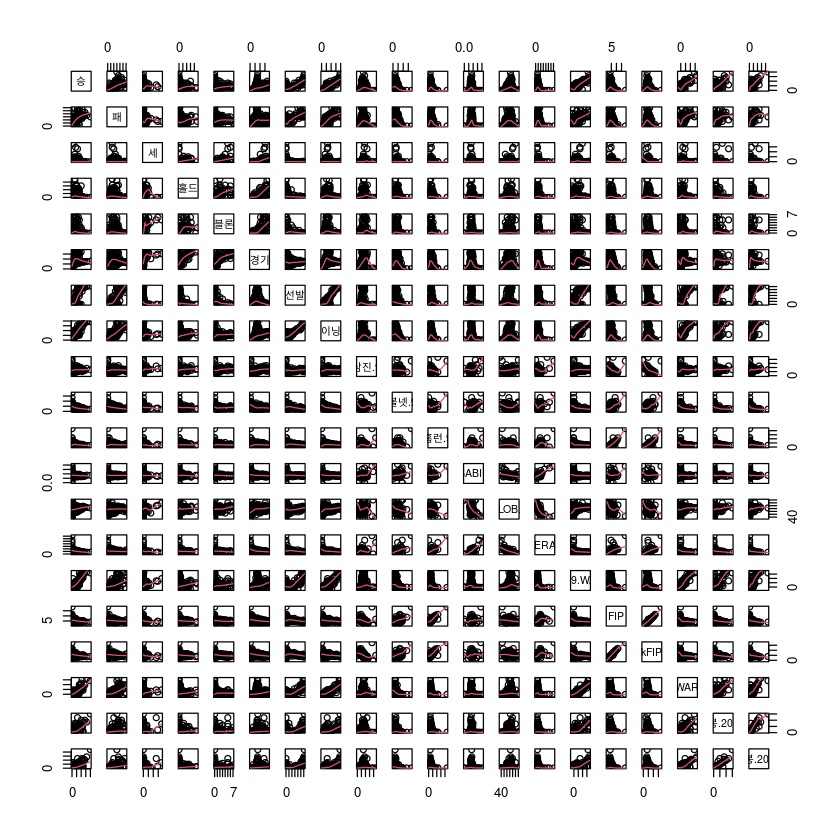

In [21]:
pairs(dt,panel=panel.smooth)

- 수치형 데이터들끼리의 상관계수 확인..

In [22]:
dt_numeric <- dt[, sapply(dt, is.numeric)]
cor_matrix <- cor(dt_numeric)
print(round(cor_matrix,2))


              승    패    세  홀드  블론  경기  선발  이닝 삼진.9 볼넷.9 홈런.9
승          1.00  0.71  0.05  0.09  0.11  0.40  0.77  0.91   0.08  -0.40  -0.12
패          0.71  1.00  0.07  0.10  0.12  0.34  0.77  0.83   0.03  -0.39  -0.06
세          0.05  0.07  1.00  0.11  0.61  0.43 -0.18  0.02   0.17  -0.13  -0.07
홀드        0.09  0.10  0.11  1.00  0.49  0.72 -0.29  0.02   0.19  -0.15  -0.08
블론        0.11  0.12  0.61  0.49  1.00  0.63 -0.26  0.01   0.19  -0.14  -0.06
경기        0.40  0.34  0.43  0.72  0.63  1.00 -0.04  0.38   0.19  -0.36  -0.11
선발        0.77  0.77 -0.18 -0.29 -0.26 -0.04  1.00  0.89  -0.06  -0.31  -0.06
이닝        0.91  0.83  0.02  0.02  0.01  0.38  0.89  1.00   0.04  -0.45  -0.11
삼진.9      0.08  0.03  0.17  0.19  0.19  0.19 -0.06  0.04   1.00   0.11   0.22
볼넷.9     -0.40 -0.39 -0.13 -0.15 -0.14 -0.36 -0.31 -0.45   0.11   1.00   0.30
홈런.9     -0.12 -0.06 -0.07 -0.08 -0.06 -0.11 -0.06 -0.11   0.22   0.30   1.00
BABIP      -0.17 -0.13 -0.09 -0.10 -0.11 -0.24 -0.10 -0.19   0.46   0.28   0.3

# 다중공산성 해결 방법

## VIF계수가 높은 변수 제거

### model2(Vif 10 이상인 변수 제거)

In [23]:
model2 <- lm(연봉.2018. ~ .-경기-선발-이닝-삼진.9-볼넷.9-홈런.9-ERA-RA9.WAR-FIP-kFIP, dt)
summary(model2)


Call:
lm(formula = 연봉.2018. ~ . - 경기 - 선발 - 이닝 - 삼진.9 - 
    볼넷.9 - 홈런.9 - ERA - RA9.WAR - FIP - kFIP, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-48657  -1981    511   2303  51073 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.432e+03  7.893e+03   0.815   0.4165    
승           4.770e+02  4.061e+02   1.175   0.2421    
패          -7.851e+02  3.525e+02  -2.227   0.0275 *  
세          -1.172e+02  2.150e+02  -0.545   0.5865    
홀드        -1.229e+02  1.973e+02  -0.623   0.5344    
블론         6.340e+02  7.188e+02   0.882   0.3792    
BABIP       -7.810e+03  9.994e+03  -0.781   0.4358    
LOB.        -4.979e+01  7.793e+01  -0.639   0.5239    
WAR          7.298e+03  1.169e+03   6.243 4.67e-09 ***
연봉.2017.   8.846e-01  4.322e-02  20.469  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9149 on 142 degrees of freedom
Multiple R-squared:  0.9178,	Adjusted R-squared:  0.9126 
F-statis

In [24]:
vif(model2)

승         패         세       홀드       블론      BABIP       LOB. 
  4.441338   2.197878   1.929158   1.431559   2.488141   1.426703   1.472253 
       WAR 연봉.2017. 
  4.309374   2.113576

- model1에서 다중공산성이 높았던 변수들을 제외하고 lm을 돌렸더니, 회귀모형은 유의하게 나왔고 R^2값도 91%로 높게 나왔지만 model1보다는 R^2값이 조금 적게 나왔다. 

- 다중공산성이 높은 변수를 제외하는 것은 다른 것들도 확인을 해보아야 한다.

### VIF제거시 고려사항

- 1. VIF계수가 높은 피처 우선 제거하되, FIP, kFIP와 같이 유사한 변수들은 두개 중에서 하나만 제거해보자.


In [25]:
model3 <- lm(연봉.2018. ~ .-FIP, dt)
summary(model3)


Call:
lm(formula = 연봉.2018. ~ . - FIP, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-46688  -2466    423   2597  47710 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.406e+04  1.660e+04   0.847    0.399    
승           1.007e+03  5.352e+02   1.882    0.062 .  
패          -1.723e+02  5.427e+02  -0.317    0.751    
세          -2.263e+01  2.701e+02  -0.084    0.933    
홀드        -1.779e+01  3.149e+02  -0.056    0.955    
블론         4.563e+02  7.579e+02   0.602    0.548    
경기        -1.738e+02  1.443e+02  -1.205    0.230    
선발        -6.701e+02  4.598e+02  -1.458    0.147    
이닝         7.216e+01  1.142e+02   0.632    0.529    
삼진.9      -7.714e+02  9.085e+02  -0.849    0.397    
볼넷.9       8.998e+02  9.504e+02   0.947    0.346    
홈런.9       2.904e+03  3.404e+03   0.853    0.395    
BABIP       -9.797e+03  1.474e+04  -0.665    0.507    
LOB.        -4.465e+01  1.292e+02  -0.346    0.730    
ERA         -8.076e+01  5.654e+02  -0.143   

In [26]:
vif(model3)

승         패         세       홀드       블론       경기       선발 
  7.688409   5.191403   3.032640   3.635790   2.757753  14.042653  36.133199 
      이닝     삼진.9     볼넷.9     홈런.9      BABIP       LOB.        ERA 
 59.370946  11.866657   9.068260  21.559530   3.092052   4.030566   9.978171 
   RA9.WAR       kFIP        WAR 연봉.2017. 
 13.383752  39.697741   9.991346   2.209453

- VIF계수가 가장 높았떤 FIP를 제거하니 전체적으로 VIF값들이 많이 감소했다. 볼넷의 경우 50에서 9로 감소함

In [27]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝, dt)
summary(model3)
vif(model3)


Call:
lm(formula = 연봉.2018. ~ . - FIP - 이닝, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-47170  -2539    292   2603  47529 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.425e+04  1.656e+04   0.860   0.3912    
승           1.053e+03  5.292e+02   1.989   0.0487 *  
패          -1.258e+02  5.365e+02  -0.234   0.8150    
세          -7.264e+01  2.576e+02  -0.282   0.7784    
홀드        -7.025e+01  3.031e+02  -0.232   0.8171    
블론         4.745e+02  7.557e+02   0.628   0.5312    
경기        -1.021e+02  8.877e+01  -1.150   0.2523    
선발        -4.306e+02  2.595e+02  -1.659   0.0994 .  
삼진.9      -7.892e+02  9.060e+02  -0.871   0.3853    
볼넷.9       8.829e+02  9.479e+02   0.931   0.3533    
홈런.9       2.956e+03  3.396e+03   0.871   0.3855    
BABIP       -1.004e+04  1.470e+04  -0.683   0.4957    
LOB.        -4.506e+01  1.289e+02  -0.350   0.7272    
ERA         -6.838e+01  5.637e+02  -0.121   0.9036    
RA9.WAR     -4.551e+02  1.402e+03  -0

승         패         세       홀드       블론       경기       선발 
  7.549959   5.095881   2.771881   3.382885   2.753797   5.340962  11.565229 
    삼진.9     볼넷.9     홈런.9      BABIP       LOB.        ERA    RA9.WAR 
 11.855316   9.061152  21.546490   3.089946   4.030468   9.966181  12.075932 
      kFIP        WAR 연봉.2017. 
 39.697719   9.757173   2.189063

- 그 다음 vif계수값이 높은 '이닝'을 제거했다.

In [28]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝-kFIP, dt)
summary(model3)
vif(model3)


Call:
lm(formula = 연봉.2018. ~ . - FIP - 이닝 - kFIP, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-47261  -2379    309   2742  47813 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.978e+03  1.054e+04   0.662   0.5090    
승           1.055e+03  5.278e+02   1.999   0.0476 *  
패          -1.135e+02  5.347e+02  -0.212   0.8323    
세          -7.382e+01  2.569e+02  -0.287   0.7743    
홀드        -7.661e+01  3.021e+02  -0.254   0.8002    
블론         5.038e+02  7.521e+02   0.670   0.5040    
경기        -9.923e+01  8.841e+01  -1.122   0.2637    
선발        -4.402e+02  2.583e+02  -1.704   0.0906 .  
삼진.9      -3.109e+02  3.413e+02  -0.911   0.3639    
볼넷.9       4.082e+02  4.514e+02   0.904   0.3675    
홈런.9       1.129e+03  1.118e+03   1.010   0.3143    
BABIP       -9.576e+03  1.464e+04  -0.654   0.5141    
LOB.        -3.779e+01  1.279e+02  -0.295   0.7681    
ERA         -8.963e+01  5.611e+02  -0.160   0.8733    
RA9.WAR     -4.669e+02  1.399e

승         패         세       홀드       블론       경기       선발 
  7.549454   5.087583   2.771702   3.378295   2.740995   5.324175  11.516555 
    삼진.9     볼넷.9     홈런.9      BABIP       LOB.        ERA    RA9.WAR 
  1.691074   2.065261   2.347140   3.080466   3.991015   9.922616  12.073290 
       WAR 연봉.2017. 
  9.713408   2.188350

- KFIP제거

In [29]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝-kFIP-RA9.WAR, dt)
summary(model3)
vif(model3)


Call:
lm(formula = 연봉.2018. ~ . - FIP - 이닝 - kFIP - RA9.WAR, 
    data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-47256  -2340    228   2820  48394 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.002e+03  1.005e+04   0.796   0.4273    
승           1.005e+03  5.044e+02   1.993   0.0483 *  
패          -6.188e+01  5.102e+02  -0.121   0.9036    
세          -1.005e+02  2.434e+02  -0.413   0.6805    
홀드        -8.969e+01  2.986e+02  -0.300   0.7643    
블론         5.293e+02  7.457e+02   0.710   0.4790    
경기        -1.027e+02  8.749e+01  -1.174   0.2424    
선발        -4.671e+02  2.447e+02  -1.909   0.0584 .  
삼진.9      -3.052e+02  3.398e+02  -0.898   0.3707    
볼넷.9       4.218e+02  4.481e+02   0.941   0.3482    
홈런.9       1.154e+03  1.112e+03   1.037   0.3013    
BABIP       -9.059e+03  1.451e+04  -0.624   0.5334    
LOB.        -5.310e+01  1.190e+02  -0.446   0.6562    
ERA         -1.249e+02  5.493e+02  -0.227   0.8205    
WAR          8.

승         패         세       홀드       블론       경기       선발 
  6.940427   4.662949   2.504253   3.321462   2.712783   5.249048  10.399120 
    삼진.9     볼넷.9     홈런.9      BABIP       LOB.        ERA        WAR 
  1.686721   2.048374   2.337099   3.046074   3.477615   9.571422   5.306231 
연봉.2017. 
  2.177209

In [30]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝-kFIP-RA9.WAR-선발, dt)
summary(model3)
vif(model3)


Call:
lm(formula = 연봉.2018. ~ . - FIP - 이닝 - kFIP - RA9.WAR - 
    선발, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-46776  -2395    374   2597  50018 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7221.2085 10138.7800   0.712   0.4775    
승            558.2422   451.0986   1.238   0.2180    
패           -758.5773   359.9930  -2.107   0.0369 *  
세            -12.1963   241.3026  -0.051   0.9598    
홀드          106.5326   283.0186   0.376   0.7072    
블론          843.4665   734.3349   1.149   0.2527    
경기          -69.6278    86.5803  -0.804   0.4227    
삼진.9       -270.1732   342.5480  -0.789   0.4316    
볼넷.9        431.0859   452.3679   0.953   0.3423    
홈런.9        983.4449  1119.0004   0.879   0.3810    
BABIP       -8863.3423 14648.1787  -0.605   0.5461    
LOB.          -57.5239   120.1320  -0.479   0.6328    
ERA           -88.2397   554.2171  -0.159   0.8737    
WAR          7825.6419  1264.4051   6.189 6.57e-09 ***
연봉.2017.

승         패         세       홀드       블론       경기     삼진.9 
  5.445636   2.277446   2.413913   2.927858   2.580692   5.042872   1.681813 
    볼넷.9     홈런.9      BABIP       LOB.        ERA        WAR 연봉.2017. 
  2.048132   2.322080   3.045922   3.476298   9.559743   5.010531   2.177196

- 유의미한 변수는 'WAR'과 '연봉(2017)'이다.

## 정규화

### normalize

In [31]:
normalize <- function(x) {
  return((x - mean(x)) / sd(x))
}

In [32]:
df_normalized <- as.data.frame(lapply(dt, normalize))

In [33]:
head(df_normalized)

,승,패,세,홀드,블론,경기,선발,이닝,삼진.9,볼넷.9,홈런.9,BABIP,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2017.,연봉.2018.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.313623,1.2271453,-0.3064519,-0.5857052,-0.5435919,0.05943348,2.452068,2.645175,0.6720988,-0.8689998,-0.44238194,0.01678276,0.4466146,-0.5870557,3.174630,-0.9710297,-1.0581252,4.503142,2.7347053,3.912893
2,2.019505,2.5047212,-0.0985024,-0.5857052,-0.5435919,0.05943348,2.349505,2.547755,0.1345315,-0.9875023,-0.66852133,-0.24168646,-0.1227637,-0.5198553,3.114968,-1.0618879,-1.0732645,4.094734,1.3373033,3.266495
3,4.348918,0.9077513,-0.3064519,-0.5857052,-0.5435919,0.11105570,2.554632,2.706808,0.1097751,-0.8859287,-0.41288550,-0.09559517,0.3085835,-0.6254559,2.973948,-0.8374147,-0.8663606,3.761956,5.3298806,6.821679
4,1.760682,1.2271453,-0.3064519,-0.5857052,-0.5435919,-0.04381097,2.246942,2.350927,0.3502657,-0.9451800,-0.18674611,-0.47768010,0.5587649,-0.6278559,2.740722,-0.6984550,-0.7603854,2.998081,3.3335919,2.620098
5,2.537153,1.2271453,-0.3064519,-0.5857052,-0.5435919,0.05943348,2.452068,2.587518,0.1557512,-0.8774643,-0.29489973,-0.19673529,0.4811224,-0.5390554,2.751570,-0.6129414,-0.6190851,2.809003,2.7347053,2.975617
6,1.243035,2.1853272,-0.3064519,-0.5857052,-0.5435919,-0.14705541,2.041816,2.048726,0.1309948,-1.0340569,-0.08842464,-0.57882022,0.6536613,-0.7214564,2.963100,-0.5808738,-0.6140386,2.476226,0.7384167,2.135301


In [34]:
model4 <- lm(연봉.2018. ~ ., df_normalized)
summary(model4)


Call:
lm(formula = 연봉.2018. ~ ., data = df_normalized)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50382 -0.07816  0.01372  0.08561  1.54402 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.061e-16  2.411e-02   0.000   1.0000    
승           1.254e-01  6.712e-02   1.869   0.0639 .  
패          -1.858e-02  5.569e-02  -0.334   0.7392    
세          -3.282e-03  4.216e-02  -0.078   0.9381    
홀드        -2.652e-03  4.613e-02  -0.057   0.9542    
블론         2.395e-02  4.019e-02   0.596   0.5522    
경기        -1.102e-01  9.116e-02  -1.209   0.2289    
선발        -2.117e-01  1.455e-01  -1.456   0.1479    
이닝         1.207e-01  1.879e-01   0.642   0.5217    
삼진.9      -4.207e-02  2.146e-01  -0.196   0.8449    
볼넷.9       9.115e-02  1.723e-01   0.529   0.5976    
홈런.9       1.602e-01  4.643e-01   0.345   0.7306    
BABIP       -2.875e-02  4.273e-02  -0.673   0.5022    
LOB.        -1.630e-02  4.866e-02  -0.335   0.7382    
ERA         -9.982e

In [35]:
threshold <- 10

In [36]:
high_vif_vars <- ㅍget_high_vif_variables(model4, threshold)
print(high_vif_vars)

 [1] "경기"    "선발"    "이닝"    "삼진.9"  "볼넷.9"  "홈런.9"  "ERA"    
 [8] "RA9.WAR" "FIP"     "kFIP"   


In [37]:
vif(model4)

승           패           세         홀드         블론         경기 
    7.699347     5.300328     3.037186     3.636052     2.759560    14.201127 
        선발         이닝       삼진.9       볼넷.9       홈런.9        BABIP 
   36.160188    60.324454    78.716170    50.725799   368.399308     3.119369 
        LOB.          ERA      RA9.WAR          FIP         kFIP          WAR 
    4.046025    10.044174    13.419897 12525.242406  9046.048805     9.991779 
  연봉.2017. 
    2.211869

In [38]:
### 

## 변수선택

### model3(AIC)

`-` AIC(Step)

In [39]:
m0 = lm(연봉.2018. ~ 1, data = dt)

In [40]:
model3 = step(
 m0,
 scope = 연봉.2018. ~연봉.2017.+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 direction = "both")

Start:  AIC=3144.3
연봉.2018. ~ 1

             Df  Sum of Sq        RSS    AIC
+ 연봉.2017.  1 1.2511e+11 1.9445e+10 2841.4
+ WAR         1 9.0535e+10 5.4022e+10 2996.7
+ RA9.WAR     1 7.9230e+10 6.5326e+10 3025.6
+ 승          1 7.3377e+10 7.1179e+10 3038.6
+ 이닝        1 6.2759e+10 8.1797e+10 3059.8
+ 선발        1 4.5409e+10 9.9147e+10 3089.0
+ 패          1 3.1910e+10 1.1265e+11 3108.4
+ 볼넷.9      1 1.5661e+10 1.2890e+11 3128.9
+ kFIP        1 1.2591e+10 1.3197e+11 3132.4
+ FIP         1 1.1403e+10 1.3315e+11 3133.8
+ ERA         1 6.7332e+09 1.3782e+11 3139.1
+ 세          1 6.4461e+09 1.3811e+11 3139.4
+ 경기        1 6.3714e+09 1.3819e+11 3139.4
+ LOB.        1 2.2831e+09 1.4227e+11 3143.9
+ 홈런.9      1 1.9575e+09 1.4260e+11 3144.2
<none>                     1.4456e+11 3144.3
+ 삼진.9      1 1.5567e+09 1.4300e+11 3144.7
+ BABIP       1 1.5139e+09 1.4304e+11 3144.7
+ 블론        1 1.3815e+09 1.4318e+11 3144.8
+ 홀드        1 4.3499e+07 1.4451e+11 3146.3

Step:  AIC=2841.38
연봉.2018. ~ 연봉.2017.

  

#### summary

In [41]:
summary(model3)


Call:
lm(formula = 연봉.2018. ~ 연봉.2017. + WAR + kFIP + 승 + 
    이닝, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-48717  -2879    204   3083  48961 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.691e+03  2.658e+03  -1.012  0.31310    
연봉.2017.   8.862e-01  4.018e-02  22.058  < 2e-16 ***
WAR          8.118e+03  1.152e+03   7.048 6.68e-11 ***
kFIP         6.737e+02  4.029e+02   1.672  0.09666 .  
승           1.059e+03  4.727e+02   2.240  0.02659 *  
이닝        -9.701e+01  3.693e+01  -2.627  0.00954 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8929 on 146 degrees of freedom
Multiple R-squared:  0.9195,	Adjusted R-squared:  0.9167 
F-statistic: 333.4 on 5 and 146 DF,  p-value: < 2.2e-16


- AIC를 이용하면 최종 모형은 "연봉.2018. ~ 연봉.2017. + WAR + kFIP+승+이닝" 이다.

In [42]:
vif(model3)

연봉.2017.        WAR       kFIP         승       이닝 
  1.917525   4.392707   1.207220   6.316517   6.534361

연봉.2018. ~ 연봉.2017. + WAR + kFIP + 승 + 
    이닝

### 후진

In [43]:
model_back = step(model1, direction = "backward")
summary(model_back)

Start:  AIC=2775.03
연봉.2018. ~ +WAR + 연봉.2017.

             Df  Sum of Sq        RSS    AIC
<none>                     1.2403e+10 2775.0
- WAR         1 7.0421e+09 1.9445e+10 2841.4
- 연봉.2017.  1 4.1619e+10 5.4022e+10 2996.7



Call:
lm(formula = 연봉.2018. ~ +WAR + 연봉.2017., data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-50442  -1849    758   2050  56166 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -576.58811  889.09610  -0.649    0.518    
WAR         7007.17364  761.83979   9.198 3.03e-16 ***
연봉.2017.     0.89926    0.04022  22.360  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9124 on 149 degrees of freedom
Multiple R-squared:  0.9142,	Adjusted R-squared:  0.913 
F-statistic: 793.8 on 2 and 149 DF,  p-value: < 2.2e-16


In [44]:
vif(model_back)

WAR 연봉.2017. 
  1.840597   1.840597

연봉.2018. ~ 승 + 경기 + 선발 + WAR + 연봉.2017.

### 전진

In [45]:
m0 = lm(연봉.2018. ~ 1, data = dt)

In [46]:
model_forward = step(
 m0,
 scope = 연봉.2018. ~연봉.2017.+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 direction = "forward")
summary(model_forward)

Start:  AIC=3144.3
연봉.2018. ~ 1

             Df  Sum of Sq        RSS    AIC
+ 연봉.2017.  1 1.2511e+11 1.9445e+10 2841.4
+ WAR         1 9.0535e+10 5.4022e+10 2996.7
+ RA9.WAR     1 7.9230e+10 6.5326e+10 3025.6
+ 승          1 7.3377e+10 7.1179e+10 3038.6
+ 이닝        1 6.2759e+10 8.1797e+10 3059.8
+ 선발        1 4.5409e+10 9.9147e+10 3089.0
+ 패          1 3.1910e+10 1.1265e+11 3108.4
+ 볼넷.9      1 1.5661e+10 1.2890e+11 3128.9
+ kFIP        1 1.2591e+10 1.3197e+11 3132.4
+ FIP         1 1.1403e+10 1.3315e+11 3133.8
+ ERA         1 6.7332e+09 1.3782e+11 3139.1
+ 세          1 6.4461e+09 1.3811e+11 3139.4
+ 경기        1 6.3714e+09 1.3819e+11 3139.4
+ LOB.        1 2.2831e+09 1.4227e+11 3143.9
+ 홈런.9      1 1.9575e+09 1.4260e+11 3144.2
<none>                     1.4456e+11 3144.3
+ 삼진.9      1 1.5567e+09 1.4300e+11 3144.7
+ BABIP       1 1.5139e+09 1.4304e+11 3144.7
+ 블론        1 1.3815e+09 1.4318e+11 3144.8
+ 홀드        1 4.3499e+07 1.4451e+11 3146.3

Step:  AIC=2841.38
연봉.2018. ~ 연봉.2017.

  


Call:
lm(formula = 연봉.2018. ~ 연봉.2017. + WAR + 패 + kFIP + 
    승 + 이닝, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-48378  -2526    133   2563  48361 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.653e+03  2.664e+03  -0.996   0.3209    
연봉.2017.   8.856e-01  4.027e-02  21.992  < 2e-16 ***
WAR          8.003e+03  1.169e+03   6.848 1.97e-10 ***
패          -2.708e+02  4.288e+02  -0.631   0.5287    
kFIP         6.622e+02  4.042e+02   1.639   0.1035    
승           1.025e+03  4.767e+02   2.150   0.0332 *  
이닝        -7.811e+01  4.760e+01  -1.641   0.1029    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8948 on 145 degrees of freedom
Multiple R-squared:  0.9197,	Adjusted R-squared:  0.9164 
F-statistic: 276.8 on 6 and 145 DF,  p-value: < 2.2e-16


In [47]:
vif(model_forward)

연봉.2017.        WAR         패       kFIP         승       이닝 
  1.918527   4.502754   3.399374   1.209654   6.398277  10.808689

연봉.2018. ~ 연봉.2017. + WAR + 패 + kFIP + 
    승 + 이닝

## PCA(주성분분석)

- 서로 상관성이 높은 변수들의 선형 결합으로 만들어 기존의 상관성이 높은 변수들을 요약, 축소하는 기법

In [48]:
dt2 <- dt[,1:19] # 설명변수

In [49]:
dt3 <- dt[,20] # 종속변수

In [50]:
procomp.result2 <- prcomp(dt2, center=T, scale=T)
summary(procomp.result2)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6109 1.8528 1.5587 1.27735 1.07673 0.94635 0.77437
Proportion of Variance 0.3588 0.1807 0.1279 0.08588 0.06102 0.04714 0.03156
Cumulative Proportion  0.3588 0.5395 0.6673 0.75322 0.81424 0.86137 0.89293
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.75305 0.60013 0.57118 0.51280 0.43707 0.31874 0.28648
Proportion of Variance 0.02985 0.01896 0.01717 0.01384 0.01005 0.00535 0.00432
Cumulative Proportion  0.92278 0.94173 0.95890 0.97274 0.98280 0.98815 0.99247
                          PC15    PC16   PC17    PC18     PC19
Standard deviation     0.27007 0.21161 0.1236 0.10061 0.006742
Proportion of Variance 0.00384 0.00236 0.0008 0.00053 0.000000
Cumulative Proportion  0.99630 0.99866 0.9995 1.00000 1.000000

In [51]:
dt.pca <- princomp(dt2, cor=TRUE)

In [52]:
summary(dt.pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.6109027 1.8528422 1.5587351 1.2773530 1.07672785
Proportion of Variance 0.3587796 0.1806855 0.1278766 0.0858753 0.06101805
Cumulative Proportion  0.3587796 0.5394651 0.6673417 0.7532170 0.81423504
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.94635475 0.77436931 0.75305028 0.60012648 0.57117946
Proportion of Variance 0.04713617 0.03156041 0.02984656 0.01895536 0.01717084
Cumulative Proportion  0.86137122 0.89293163 0.92277819 0.94173355 0.95890439
                          Comp.11   Comp.12    Comp.13     Comp.14     Comp.15
Standard deviation     0.51280325 0.4370697 0.31874103 0.286476368 0.270069813
Proportion of Variance 0.01384038 0.0100542 0.00534715 0.004319406 0.003838827
Cumulative Proportion  0.97274477 0.9827990 0.98814612 0.992465529 0.996304355
                           Comp.16      Comp.17   

- 제 1주성분과 제6주성분까지의 누적 분산비율은 대략 85.71%로 6개의 주성분 변수를 활용해 전체 데이터의 85.71%를 설명할 수 있다.

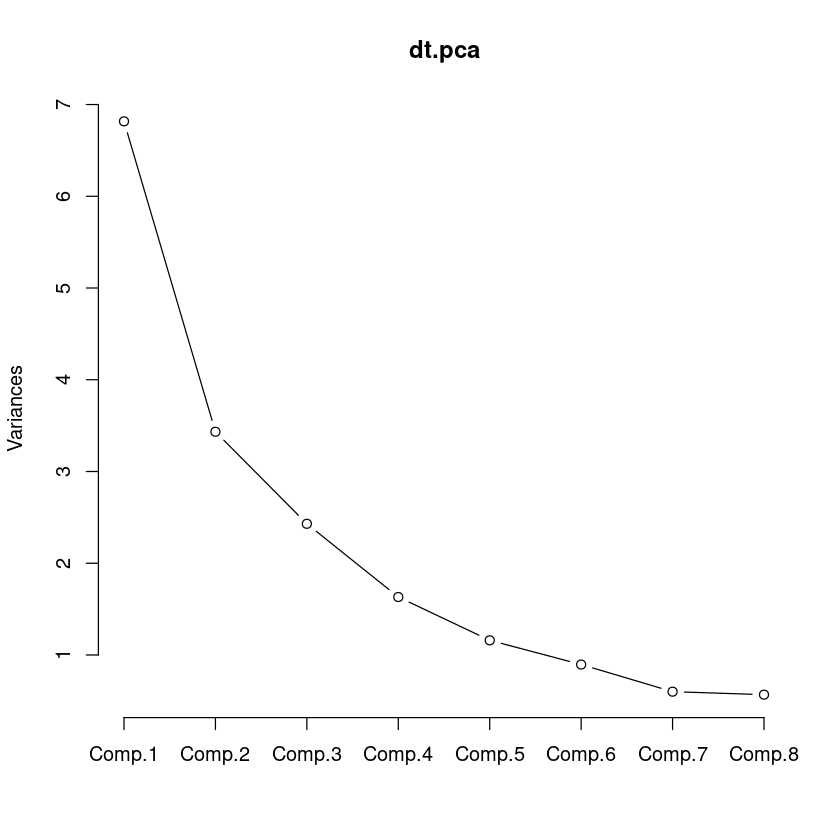

In [53]:
screeplot(dt.pca, npcs=8, type="lines")

- 주성분들에 의해 설명되는 변동 비율

In [54]:
loadings(dt.pca)


Loadings:
           Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
승          0.322  0.201                              0.105              
패          0.272  0.198         0.108  0.236 -0.108        -0.477 -0.294
세                -0.202  0.289  0.126 -0.512 -0.426        -0.192  0.360
홀드              -0.253  0.336  0.141  0.417  0.343  0.154  0.296       
블론              -0.274  0.396  0.204        -0.208  0.116 -0.183 -0.354
경기        0.191 -0.220  0.372  0.222  0.227                       0.236
선발        0.261  0.350 -0.123                             -0.250 -0.105
이닝        0.329  0.235                0.109               -0.134       
삼진.9                    0.393 -0.404 -0.229  0.455 -0.171 -0.204 -0.211
볼넷.9     -0.250  0.116               -0.236  0.289  0.752 -0.178       
홈런.9     -0.173  0.286  0.276  0.268         0.154 -0.535              
BABIP      -0.142  0.207  0.292 -0.444                              0.146
LOB.        0.131 -0.209 -0.230  0.228 -0.416 

# 능형회귀

In [55]:
rfit <- lm.ridge(연봉.2018.~., dt, lambda=seq(0.01,20,0.1))

In [56]:
select(rfit) 

ERROR: Error in UseMethod("select"): no applicable method for 'select' applied to an object of class "ridgelm"


In [57]:
round(rfit$coef[,rfit$lam=='4.11'],3)

승         패         세       홀드       블론       경기       선발 
  3659.317   -737.614    -93.401   -155.777    859.526  -1932.839  -3234.453 
      이닝     삼진.9     볼넷.9     홈런.9      BABIP       LOB.        ERA 
   441.579   -934.786   1047.402   1328.778   -755.310   -578.691   -288.368 
   RA9.WAR        FIP       kFIP        WAR 연봉.2017. 
   516.127   -176.744   -420.710   9904.312  21113.076

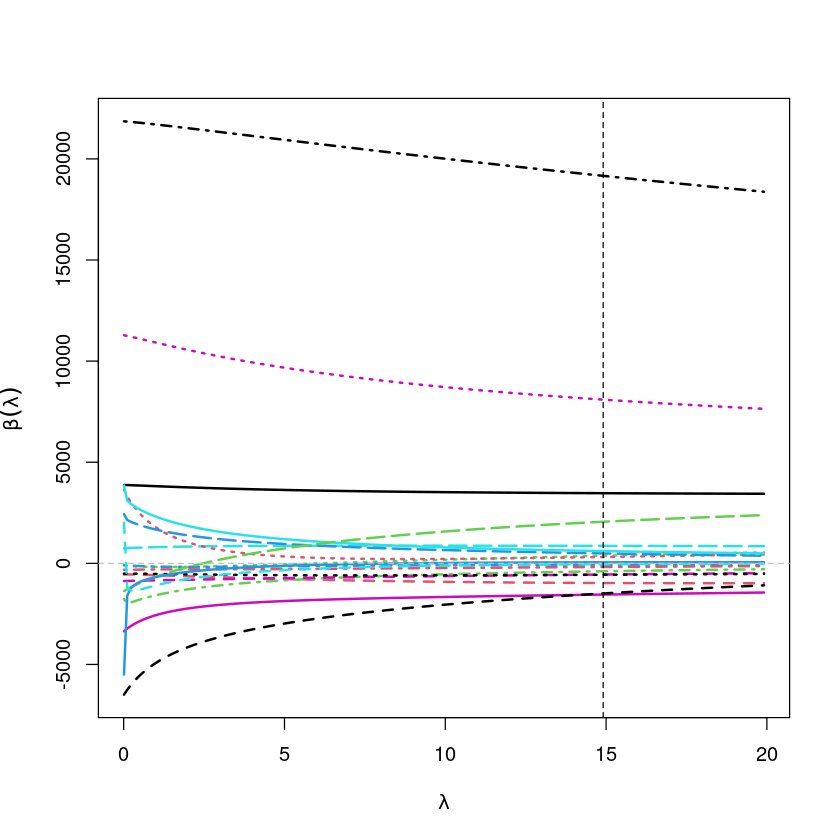

In [58]:
matplot(rfit$lambda, t(rfit$coef), type='l',
        xlab=expression(lambda),
        ylab=expression(bold(beta)(lambda)), lwd=2) 
abline(h=0, col="grey", lty=2)
abline(v=14.91, col="black", lty=2)

## glm

In [59]:

X <- model.matrix(연봉.2018.~., dt)[,-1] 
y <- dt$연봉.2018.

In [60]:
head(X)

,승,패,세,홀드,블론,경기,선발,이닝,삼진.9,볼넷.9,홈런.9,BABIP,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2017.
1,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
2,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
3,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
4,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
5,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
6,8,10,0,0,0,26,26,160.0,7.42,1.74,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94,35000


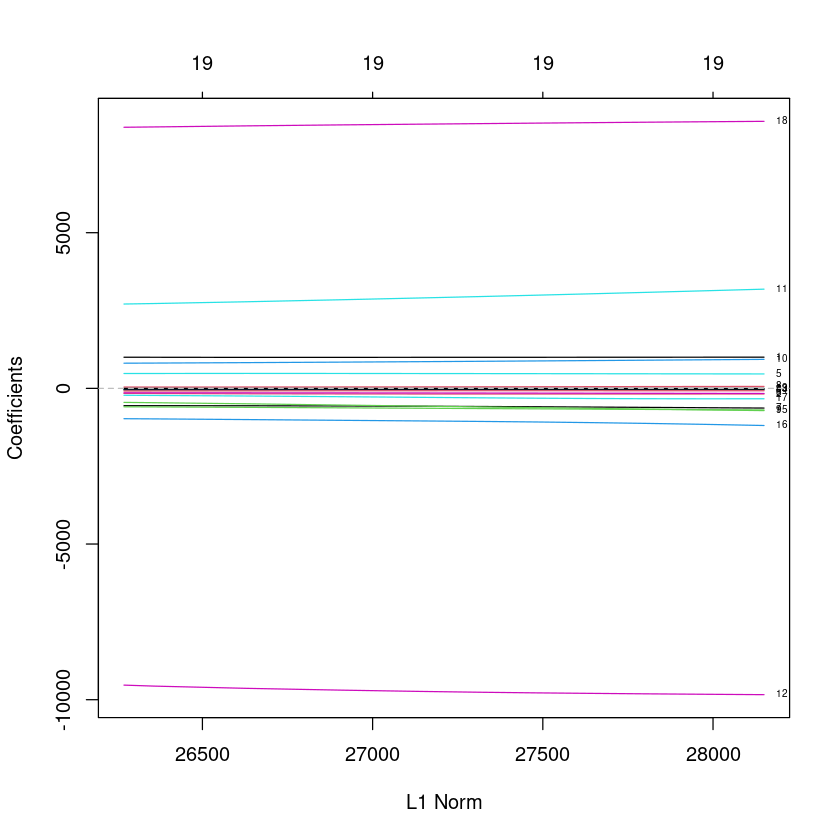

In [61]:
ridge.fit<-glmnet(X,y,alpha=0, lambda=seq(0,100,10)) ##ridge : alpha=0 
plot(ridge.fit, label=TRUE)
abline(h=0, col="grey", lty=2)

In [62]:
summary(ridge.fit)

          Length Class     Mode   
a0         11    -none-    numeric
beta      209    dgCMatrix S4     
df         11    -none-    numeric
dim         2    -none-    numeric
lambda     11    -none-    numeric
dev.ratio  11    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

In [63]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=length(y))

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


In [64]:
cv.fit


Call:  cv.glmnet(x = X, y = y, nfolds = length(y), alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index   Measure       SE Nonzero
min   2869   100 117171048 49876335      19
1se  12711    84 166795504 78214517      19

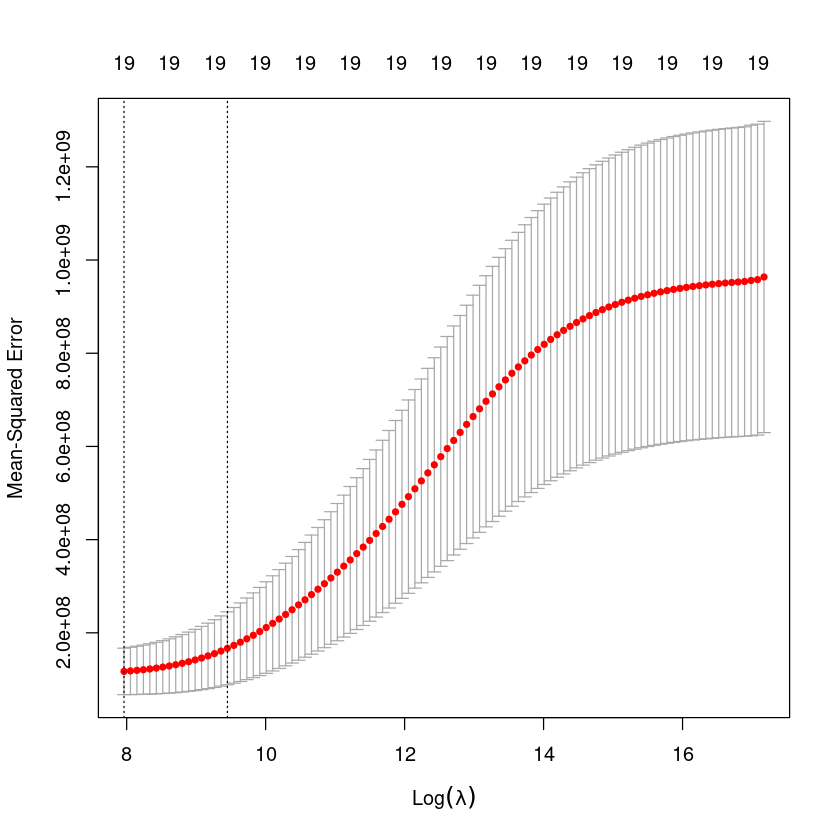

In [65]:
plot(cv.fit)

# 예측

WAR이라는 변수가 다른 설명변수의 곱으로 이루어진 변수니까, 인터넷에서 나오는 WAR계산법에 들어가는 변수들을 제거해보자.(근데 인터넷에 말이 다 다름 ㅎㅎ)

ERA, 이닝수, FIP는 일단 빼야함.

FIP자체가 홈런, 삼진, 볼넷 등의 값인데..

step, 전진: 연봉.2017.이랑 kFIP, 볼넷.9, 삼진.9를ㄴ넣어보자.

연봉.2018. ~ 연봉.2017. + WAR + kFIP + 승 + 
    이닝

후진: 연봉.2018. ~ 연봉.2017. + WAR + 패 + kFIP + 
    승 + 이닝

연봉.2018. ~ 연봉.2017. + WAR + 패 + kFIP + 
    승 + 이닝

In [68]:
X <- data.frame(FIP = dt$"FIP",
                        WAR = dt$"WAR",
                        `볼넷/9` = dt$"볼넷.9",
                        `삼진/9` = dt$"삼진.9",
                        `연봉.2017.` = dt$"연봉.2017.")

In [80]:
y <- picher$"연봉.2018."

In [81]:
set.seed(19)
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_indices, ]
X_test <- X[-train_indices, ]
y_train <- y[train_indices]
y_test <- y[-train_indices]

In [83]:
model <- lm(y_train ~ ., data = cbind(X_train, y_train))

In [84]:
summary(model)


Call:
lm(formula = y_train ~ ., data = cbind(X_train, y_train))

Residuals:
   Min     1Q Median     3Q    Max 
-48253  -2002   -534   3472  43845 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2312.85178 1754.63797   1.318  0.19003    
승          1322.49243  533.83994   2.477  0.01467 *  
WAR         8040.03263 1345.09686   5.977 2.52e-08 ***
경기        -148.06296   57.54624  -2.573  0.01133 *  
선발        -522.51845  187.30514  -2.790  0.00616 ** 
연봉.2017.     0.88556    0.04671  18.957  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9453 on 117 degrees of freedom
Multiple R-squared:  0.9143,	Adjusted R-squared:  0.9106 
F-statistic: 249.6 on 5 and 117 DF,  p-value: < 2.2e-16


### ㅎ므

In [82]:
X <- data.frame('승' = picher$"승",
                        WAR = picher$"WAR",
                        `경기` = picher$"경기",
                        `선발` = picher$"선발",
                        `연봉.2017.` = picher$"연봉.2017.")

In [85]:
predict_2018_salary <- predict(model, newdata = X)

In [86]:
picher <- cbind(picher, new_col = predict_2018_salary)

In [87]:
head(picher)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,⋯,BABIP,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2018.,연봉.2017.,new_col
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,켈리,SK,16,7,0,0,0,30,30,190.0,⋯,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,131853.25
2,소사,LG,11,11,1,0,0,30,29,185.1,⋯,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,90426.95
3,양현종,KIA,20,6,0,0,0,31,31,193.1,⋯,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,186155.07
4,차우찬,LG,10,7,0,0,0,28,28,175.2,⋯,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,122543.26
5,레일리,롯데,13,7,0,0,0,30,30,187.1,⋯,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,109876.10
6,피어밴드,KT,8,10,0,0,0,26,26,160.0,⋯,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,58130.15


In [88]:
predictsalart <- round(predict_2018_salary,0)

In [89]:
result1 <- picher$"선수명"
result2 <- picher$"연봉.2018."
result3 <- predictsalart
result4 <- picher$"연봉.2017."
result <- cbind(result1,result2,result3,result4)

In [90]:
result

,result1,result2,result3,result4
1,켈리,140000,131853,85000
2,소사,120000,90427,50000
3,양현종,230000,186155,150000
4,차우찬,100000,122543,100000
5,레일리,111000,109876,85000
6,피어밴드,85000,58130,35000
7,고영표,11500,32371,5200
8,장원준,100000,120891,100000
9,함덕주,16000,33083,7000
10,팻딘,70000,85876,70000


# k-fold

In [1]:
X <- dt[c('승', '경기', '선발', 'WAR', '연봉.2017.')]
y <- dt$"연봉.2018."

ERROR: Error in dt[c("승", "경기", "선발", "WAR", "연봉.2017.")]: object of type 'closure' is not subsettable


In [126]:
ctrl <- trainControl(method = "cv", 
                     number = 10, 
                     verboseIter = TRUE)

In [128]:
print(model)

Linear Regression 

152 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 136, 139, 137, 136, 137, 136, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  8775.345  0.9234182  5096.303

Tuning parameter 'intercept' was held constant at a value of TRUE


# createDataPartition

In [129]:

set.seed(20) 
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)  # 80%를 훈련 세트로 사용
X_train <- X[train_indices, ]  # X 훈련 세트
y_train <- y[train_indices]  # y 훈련 세트
X_test <- X[-train_indices, ]  # X 테스트 세트
y_test <- y[-train_indices]  # y 테스트 세트


In [130]:
model <- lm(y_train ~ ., data = cbind(X_train, y_train))

In [131]:
summary(model)


Call:
lm(formula = y_train ~ ., data = cbind(X_train, y_train))

Residuals:
   Min     1Q Median     3Q    Max 
-51628  -1742    835   2679  54478 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.132e+03  3.752e+03  -0.835    0.406    
FIP          3.656e+02  6.383e+02   0.573    0.568    
WAR          6.521e+03  9.510e+02   6.857 3.53e-10 ***
볼넷.9       4.095e+02  4.922e+02   0.832    0.407    
삼진.9      -2.664e+02  3.220e+02  -0.827    0.410    
연봉.2017.   9.436e-01  4.885e-02  19.314  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9407 on 117 degrees of freedom
Multiple R-squared:  0.9084,	Adjusted R-squared:  0.9045 
F-statistic: 232.1 on 5 and 117 DF,  p-value: < 2.2e-16


In [132]:
y_pred <- predict(model, newdata = X_test)


In [133]:
y_pred

2         11         16         20         21         23         30 
 83760.504  92856.555  49834.135  74394.604 121111.857  21354.395  11877.920 
        31         36         39         41         47         51         58 
 13693.121  10957.933   7904.678  22618.863   3977.224   4759.883   5598.239 
        62         64         67         68         73         77         80 
  2384.858   3520.118   3352.598  22782.563   2753.458   8019.611   5122.412 
        83         90         98        118        121        132        141 
 -3354.187  -1479.514   2904.841   5349.378   3656.124   2282.131   3578.686 
       142 
  4774.139

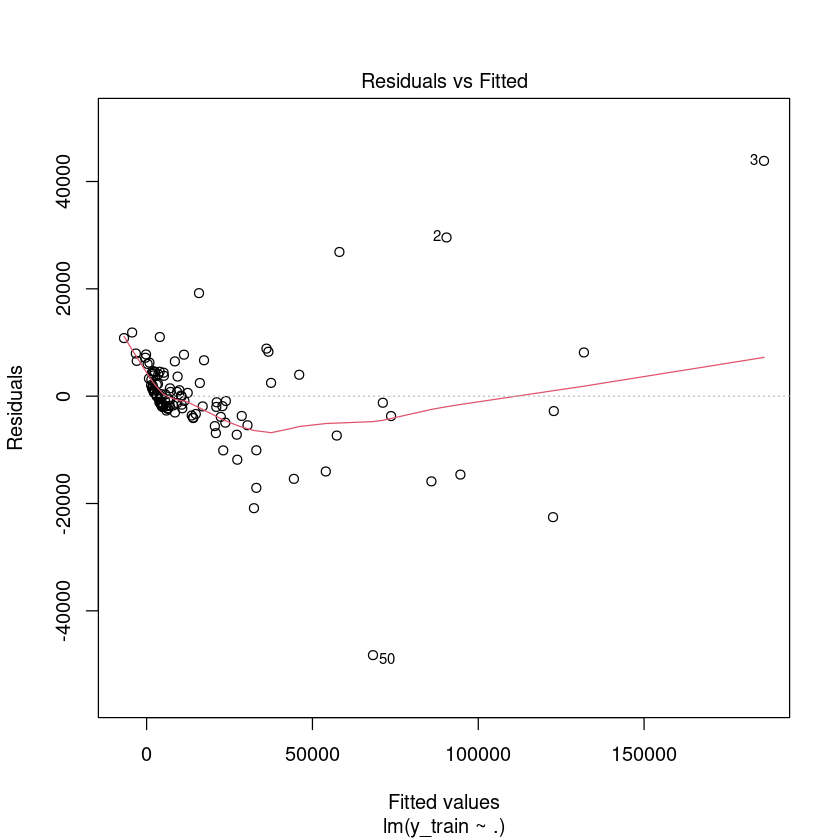

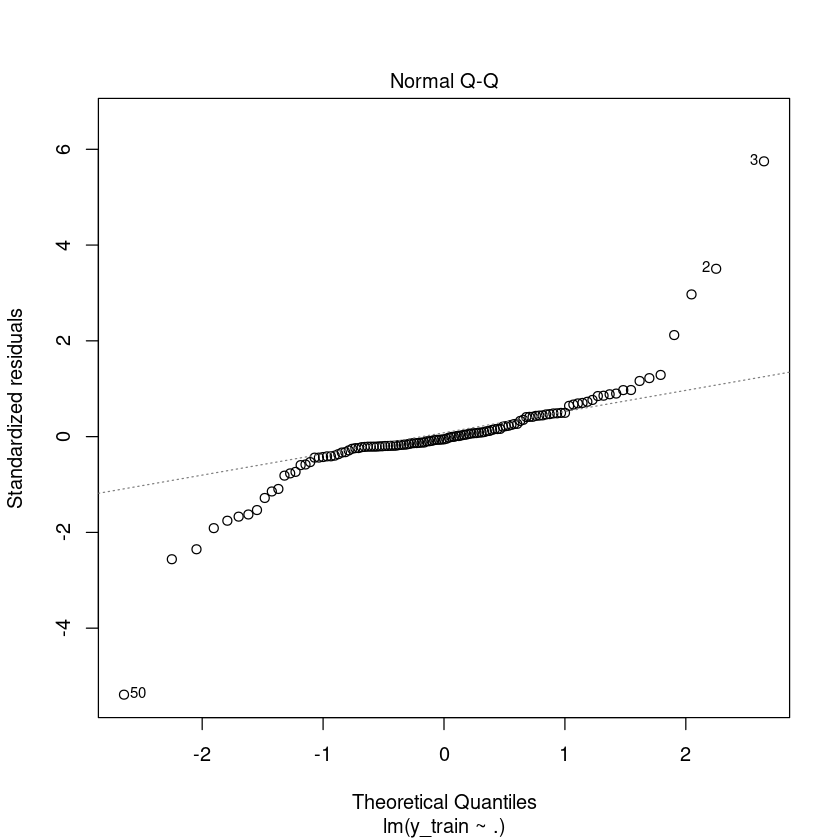

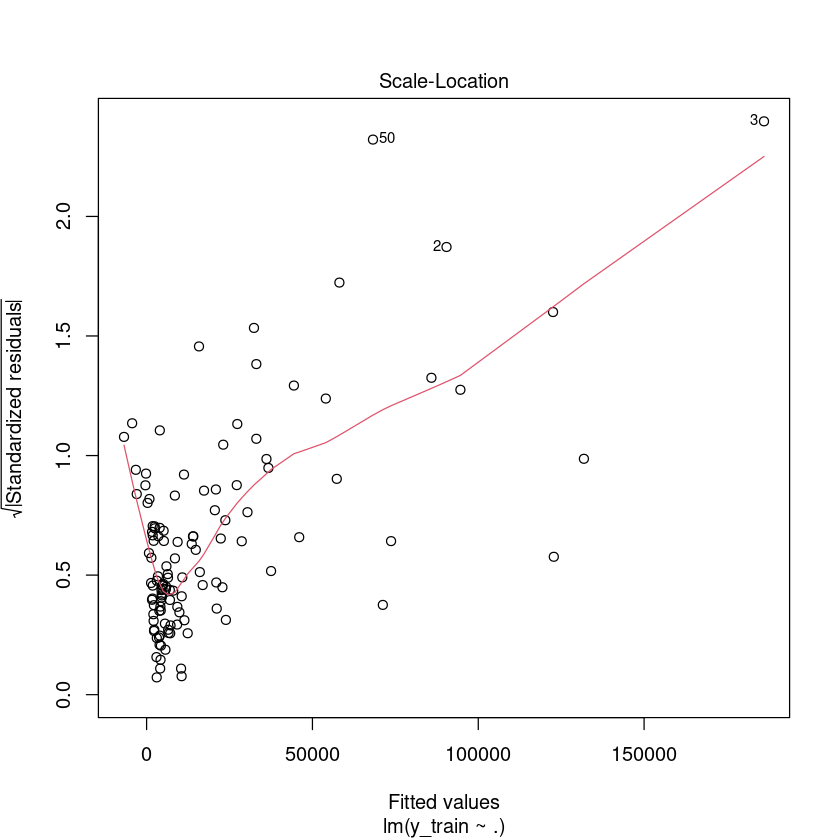

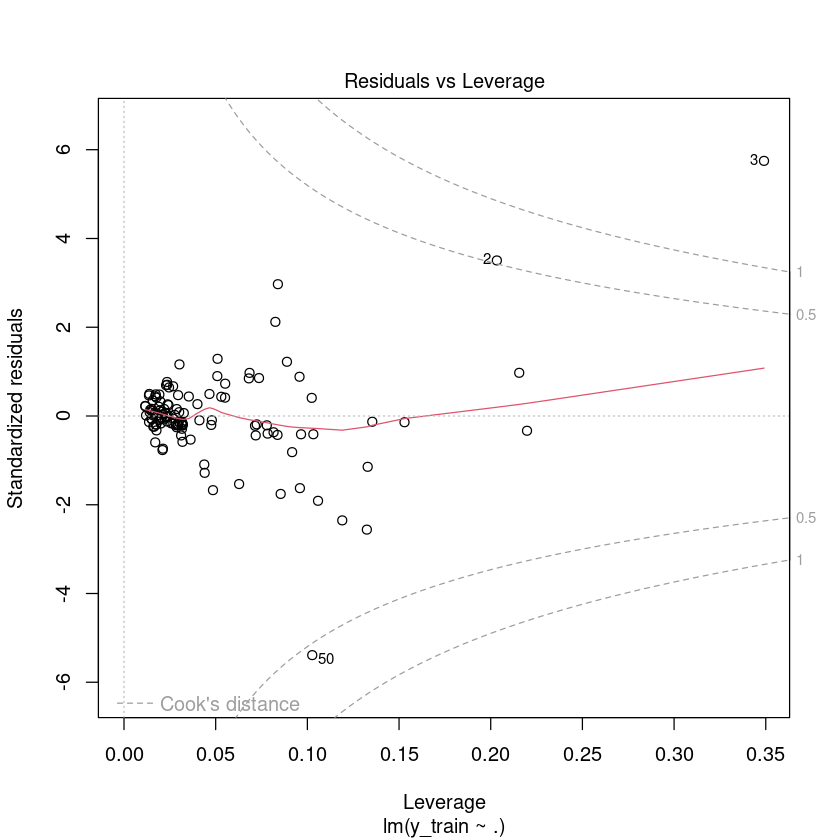

In [103]:
plot(model)

In [104]:
## Shapiro-Wilk Test
## H0 : normal distribution vs. H1 : not H0
shapiro.test(resid(model))


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.80293, p-value = 1.485e-11


귀무가설 기각

In [92]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [93]:
### 등분산성
## H0 : 등분산 vs. H1 : 이분산 (Heteroscedasticity)
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 43.35, df = 5, p-value = 3.138e-08


잔차 이분산..

In [94]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 43.35, df = 5, p-value = 3.138e-08


기각..

In [135]:
rmse <- sqrt(mean((y_pred - y_test)^2))
rmse

[1] 8169.953

In [136]:
r_squared <- 1 - sum((y_test - y_pred)^2) / sum((y_test - mean(y_test))^2)
r_squared


[1] 0.9379053

In [95]:
y_pred <- predict(model, newdata = X)
y_pred

1            2            3            4            5            6 
131853.25172  90426.94730 186155.07382 122543.25638 109876.10135  58130.14607 
           7            8            9           10           11           12 
 32370.63381 120891.41923  33082.90901  85875.56460  94612.90726  64779.24322 
          13           14           15           16           17           18 
 24736.43217  28683.80506  27341.04344  54033.60897  44409.06908  73704.79350 
          19           20           21           22           23           24 
 14822.45972  71225.84895 122776.43003  23102.47231  22358.40050  57019.04309 
          25           26           27           28           29           30 
 21138.91208  13605.10261  33080.43306  23738.25113  21005.35106  16907.23004 
          31           32           33           34           35           36 
 18149.46477   8022.27721  10555.54310  22860.98153   9305.40472  11392.92460 
          37           38           39           40           41           42 
 57338.21577  23904.74203  15323.21911  25799.86465  15797.18308  12386.75665 
          43           44           45           46           47           48 
 11268.43746  27181.63280  58218.56316     84.24915   6997.48046   6623.06609 
          49           50           51           52           53           54 
 37524.52092  68252.86726   5526.75773  46011.04637  13988.41044   5669.59301 
          55           56           57           58           59           60 
  9266.84558  30415.69333   2427.28630   3523.97146   9345.91329   8522.14286 
          61           62           63           64           65           66 
  7117.61695   5826.76177  20575.83042  -3248.10804   1432.47361   2851.50821 
          67           68           69           70           71           72 
  4305.61668  27789.00827   9890.01282   1628.47836  20886.19786   7039.25714 
          73           74           75           76           77           78 
  4256.94271  10755.72894   8543.22557   6443.23553   6491.71114   8023.19003 
          79           80           81           82           83           84 
  1852.91236   5204.00279   4539.09997  10388.50375   4754.82557   4606.76261 
          85           86           87           88           89           90 
  1841.22292   2122.67759   4822.48821   3669.56303   5893.32120   4750.24397 
          91           92           93           94           95           96 
  5123.38649   2185.01325   3907.22820   4420.48658   6368.72758   4555.81186 
          97           98           99          100          101          102 
  4555.81186   4998.59390   1349.48964   4198.77252   2038.74145   3970.30923 
         103          104          105          106          107          108 
  4088.06809   4475.41153   5980.87048   4741.08076   3938.68971   4322.76696 
         109          110          111          112          113          114 
  2309.39201   3405.05185  16045.65856   1784.80279   7212.97988    710.58117 
         115          116          117          118          119          120 
  4161.96631   3844.94661    296.34010   3734.08958   3435.14995   1648.47038 
         121          122          123          124          125          126 
  3048.69971  36138.50261   2817.42271   3075.90264   3063.77547  36720.99329 
         127          128          129          130          131          132 
  -294.77144  10583.95993   3544.07629   7803.97039   2614.93126   2236.54036 
         133          134          135          136          137          138 
  1648.88795   3977.83232   3413.20329  17310.94992   3039.19329  14080.67142 
         139          140          141          142          143          144 
  1836.91714   2969.84409   -360.15174   2110.53167   5555.91285   5459.60231 
         145          146          147          148          149          150 
 -2975.13716   2468.83069   -176.04745    853.42033  -4363.31532   9199.85371 
         151          152 
 -6817.61676  -8729.68866

In [96]:
picher <- cbind(picher, new_data= y_pred)

In [97]:
sorted_picher <- picher[order(-picher$"연봉.2018."), ]
sorted_picher

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,⋯,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2018.,연봉.2017.,new_col,new_data
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
3,양현종,KIA,20,6,0,0,0,31,31,193.1,⋯,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,186155.07,186155.07
1,켈리,SK,16,7,0,0,0,30,30,190.0,⋯,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,131853.25,131853.25
2,소사,LG,11,11,1,0,0,30,29,185.1,⋯,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,90426.95,90426.95
21,정우람,한화,6,4,26,0,5,56,0,59.0,⋯,79.4,2.75,2.85,3.26,2.69,1.81,120000,120000,122776.43,122776.43
5,레일리,롯데,13,7,0,0,0,30,30,187.1,⋯,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,109876.10,109876.10
4,차우찬,LG,10,7,0,0,0,28,28,175.2,⋯,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,122543.26,122543.26
8,장원준,두산,14,9,0,0,0,29,29,180.1,⋯,75.8,3.14,7.28,4.26,4.35,3.85,100000,100000,120891.42,120891.42
6,피어밴드,KT,8,10,0,0,0,26,26,160.0,⋯,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,58130.15,58130.15
11,윤성환,삼성,12,9,0,0,0,28,28,174.1,⋯,72.7,4.28,5.36,4.78,4.80,3.03,80000,80000,94612.91,94612.91


In [98]:
filtered_df <- picher[picher$"연봉.2018." != picher$"연봉.2017.", ]
filtered_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,⋯,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2018.,연봉.2017.,new_col,new_data
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,켈리,SK,16,7,0,0,0,30,30,190.0,⋯,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,131853.252,131853.252
2,소사,LG,11,11,1,0,0,30,29,185.1,⋯,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,90426.947,90426.947
3,양현종,KIA,20,6,0,0,0,31,31,193.1,⋯,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,186155.074,186155.074
5,레일리,롯데,13,7,0,0,0,30,30,187.1,⋯,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,109876.101,109876.101
6,피어밴드,KT,8,10,0,0,0,26,26,160.0,⋯,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,58130.146,58130.146
7,고영표,KT,8,12,0,1,0,25,24,141.2,⋯,64.6,5.08,2.97,3.88,3.78,3.87,11500,5200,32370.634,32370.634
9,함덕주,두산,9,8,0,2,0,35,24,137.1,⋯,73.1,3.67,4.99,3.91,3.67,3.78,16000,7000,33082.909,33082.909
13,임기영,KIA,8,6,0,0,0,23,19,118.1,⋯,72.3,3.65,4.25,4.07,4.19,2.79,13000,3100,24736.432,24736.432
14,박세웅,롯데,12,6,0,0,0,28,28,171.1,⋯,78.3,3.68,5.92,5.07,5.14,2.54,25000,10000,28683.805,28683.805


In [99]:
df <- filtered_df[,c("선수명","연봉.2018.","new_data","연봉.2017.")]

In [100]:
df

,선수명,연봉.2018.,new_data,연봉.2017.
,<chr>,<int>,<dbl>,<int>
1,켈리,140000,131853.252,85000
2,소사,120000,90426.947,50000
3,양현종,230000,186155.074,150000
5,레일리,111000,109876.101,85000
6,피어밴드,85000,58130.146,35000
7,고영표,11500,32370.634,5200
9,함덕주,16000,33082.909,7000
13,임기영,13000,24736.432,3100
14,박세웅,25000,28683.805,10000


In [101]:
sorted_df <- df[order(df$"연봉.2018.", decreasing = TRUE), ]


In [102]:
sorted_df

,선수명,연봉.2018.,new_data,연봉.2017.
,<chr>,<int>,<dbl>,<int>
3,양현종,230000,186155.074,150000
1,켈리,140000,131853.252,85000
2,소사,120000,90426.947,50000
5,레일리,111000,109876.101,85000
6,피어밴드,85000,58130.146,35000
24,배영수,50000,57019.043,55000
41,안영명,35000,15797.183,20000
68,채병용,30000,27789.008,25000
17,류제국,29000,44409.069,35000


# 이상치 제거

In [105]:
picher2 <- picher[-c(1,2,3,6,21,50,98),]

In [106]:
picher2

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,⋯,LOB.,ERA,RA9.WAR,FIP,kFIP,WAR,연봉.2018.,연봉.2017.,new_col,new_data
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
4,차우찬,LG,10,7,0,0,0,28,28,175.2,⋯,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,122543.256,122543.256
5,레일리,롯데,13,7,0,0,0,30,30,187.1,⋯,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,109876.101,109876.101
7,고영표,KT,8,12,0,1,0,25,24,141.2,⋯,64.6,5.08,2.97,3.88,3.78,3.87,11500,5200,32370.634,32370.634
8,장원준,두산,14,9,0,0,0,29,29,180.1,⋯,75.8,3.14,7.28,4.26,4.35,3.85,100000,100000,120891.419,120891.419
9,함덕주,두산,9,8,0,2,0,35,24,137.1,⋯,73.1,3.67,4.99,3.91,3.67,3.78,16000,7000,33082.909,33082.909
10,팻딘,KIA,9,7,0,0,0,30,29,176.0,⋯,76.5,4.14,5.66,4.65,4.61,3.64,70000,70000,85875.565,85875.565
11,윤성환,삼성,12,9,0,0,0,28,28,174.1,⋯,72.7,4.28,5.36,4.78,4.80,3.03,80000,80000,94612.907,94612.907
12,유희관,두산,11,6,0,1,0,30,29,188.2,⋯,69.7,4.53,4.79,4.78,4.97,2.89,50000,50000,64779.243,64779.243
13,임기영,KIA,8,6,0,0,0,23,19,118.1,⋯,72.3,3.65,4.25,4.07,4.19,2.79,13000,3100,24736.432,24736.432


In [107]:
aa <- lm(연봉.2018. ~ .-팀명-선수명, data=picher2)

In [108]:
summary(aa)


Call:
lm(formula = 연봉.2018. ~ . - 팀명 - 선수명, data = picher2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6719.3 -1077.4    65.0   796.1 21824.2 

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1180.5580  6767.2703  -0.174    0.862    
승            -11.5761   219.0412  -0.053    0.958    
패             81.9489   210.8035   0.389    0.698    
세            -37.2721   103.6610  -0.360    0.720    
홀드           80.5730   116.2315   0.693    0.489    
블론          370.1732   278.5525   1.329    0.186    
경기          -32.2197    53.8240  -0.599    0.551    
선발         -174.3314   168.9477  -1.032    0.304    
이닝           52.2789    42.2955   1.236    0.219    
삼진.9        201.3240   879.7268   0.229    0.819    
볼넷.9        340.5238   826.0454   0.412    0.681    
홈런.9       1665.6462  5202.1586   0.320    0.749    
BABIP         114.3823  5557.0488   0.021    0.984    
LOB.           27.0594    55.5030   0.

In [ ]:
X <- data.frame('승' = picher$"승",
                        WAR = picher$"WAR",
                        `경기` = picher$"경기",
                        `선발` = picher$"선발",
                        `연봉.2017.` = picher$"연봉.2017.")

In [109]:
X <- picher2[c('승', 'WAR', '경기', '선발', '연봉.2017.')]
y <- picher2$"연봉.2018."

In [110]:

set.seed(20) 
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)  # 80%를 훈련 세트로 사용
X_train <- X[train_indices, ]  # X 훈련 세트
y_train <- y[train_indices]  # y 훈련 세트
X_test <- X[-train_indices, ]  # X 테스트 세트
y_test <- y[-train_indices]  # y 테스트 세트


In [111]:
model2 <- lm(y_train ~ ., data = cbind(X_train, y_train))
summary(model2)


Call:
lm(formula = y_train ~ ., data = cbind(X_train, y_train))

Residuals:
    Min      1Q  Median      3Q     Max 
-7594.6 -1045.4   335.8   777.8  8330.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -291.41119  436.61649  -0.667 0.505870    
승           439.94566  149.96710   2.934 0.004065 ** 
WAR         1528.78519  392.59368   3.894 0.000168 ***
경기          43.60185   15.92552   2.738 0.007195 ** 
선발         -81.74551   51.55867  -1.585 0.115676    
연봉.2017.     0.88666    0.01366  64.889  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2315 on 112 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9865 
F-statistic:  1710 on 5 and 112 DF,  p-value: < 2.2e-16


In [112]:
y_pred <- predict(model2, newdata = X_test)


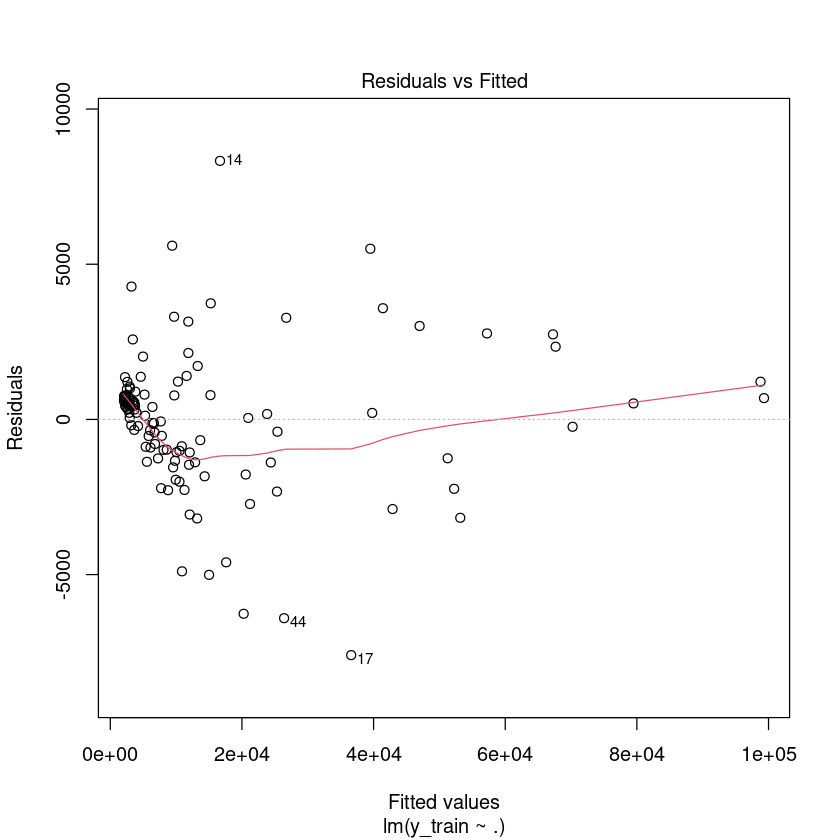

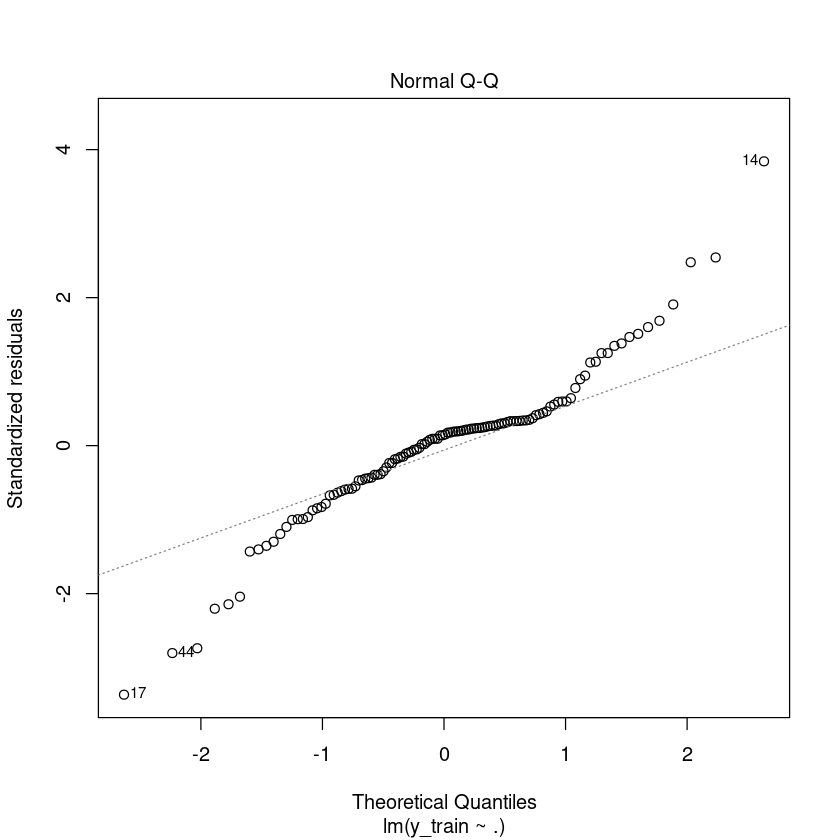

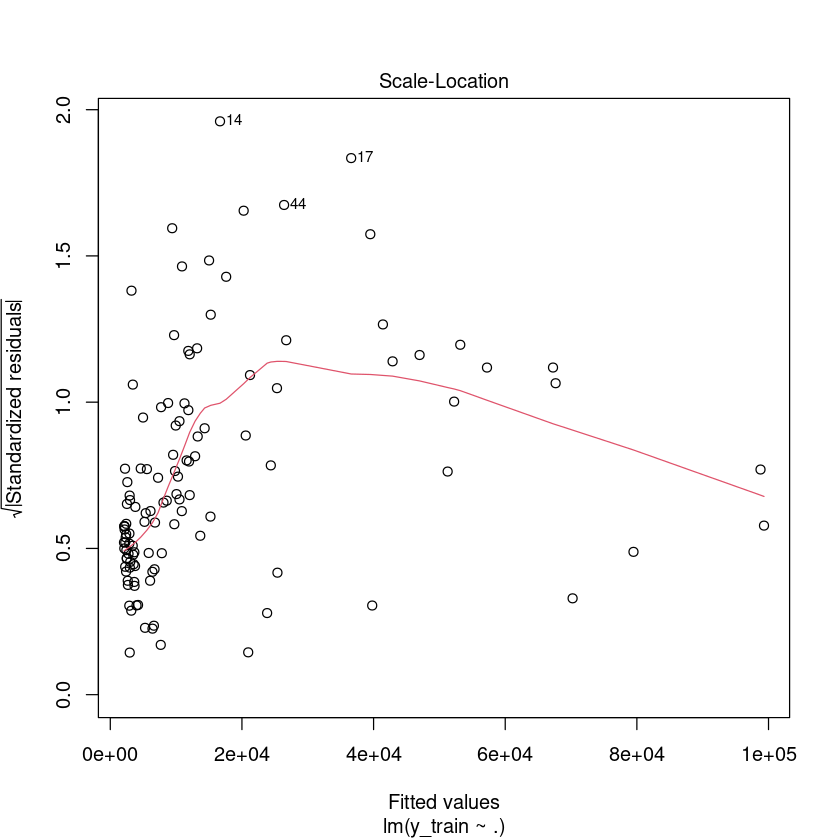

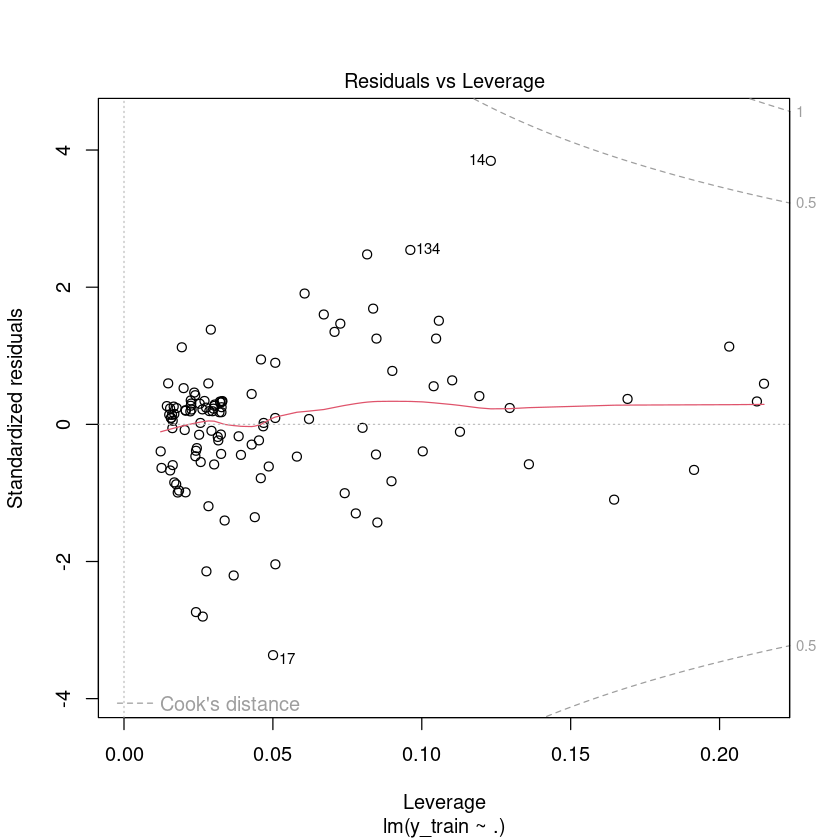

In [114]:
plot(model2)

In [115]:
## Shapiro-Wilk Test
## H0 : normal distribution vs. H1 : not H0
shapiro.test(resid(model2))


	Shapiro-Wilk normality test

data:  resid(model2)
W = 0.93815, p-value = 3.734e-05


귀무가설 기각

In [116]:
library(lmtest)

In [117]:
### 등분산성
## H0 : 등분산 vs. H1 : 이분산 (Heteroscedasticity)
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 10.625, df = 5, p-value = 0.05934


잔차 이분산..

In [119]:
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 10.625, df = 5, p-value = 0.05934


In [126]:
y_pred <- predict(model2, newdata = X)

picher2 <- cbind(picher2, new_data= y_pred)

sorted_picher2 <- picher[order(-picher2$"연봉.2018."), ]

filtered_df2 <- picher2[picher2$"연봉.2018." != picher2$"연봉.2017.", ]

df <- filtered_df2[,c("선수명","연봉.2018.","new_data","연봉.2017.")]

sorted_df <- df[order(df$"연봉.2018.", decreasing = TRUE), ]


summary(model2)

In [127]:
sorted_df

,선수명,연봉.2018.,new_data,연봉.2017.
,<chr>,<int>,<dbl>,<int>
5,레일리,111000,109876.101,85000
24,배영수,50000,57019.043,55000
41,안영명,35000,15797.183,20000
68,채병용,30000,27789.008,25000
17,류제국,29000,44409.069,35000
14,박세웅,25000,28683.805,10000
40,임창민,25000,25799.865,22500
56,박정진,25000,30415.693,33000
136,송창식,24000,17310.950,22000


다 안되노

# 번외 (WAR을 y로)

In [101]:
model_ <- lm(WAR ~ ., dt)
summary(model_)


Call:
lm(formula = WAR ~ ., data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25837 -0.18387 -0.00443  0.17470  1.58012 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.632e-01  8.184e-01   1.055   0.2935    
승           7.000e-04  2.446e-02   0.029   0.9772    
패           3.924e-02  2.449e-02   1.602   0.1115    
세           1.444e-03  1.218e-02   0.119   0.9058    
홀드         1.016e-02  1.417e-02   0.717   0.4747    
블론        -5.186e-02  3.392e-02  -1.529   0.1287    
경기        -1.216e-02  6.489e-03  -1.874   0.0631 .  
선발        -2.104e-02  2.081e-02  -1.011   0.3139    
이닝         7.125e-03  5.161e-03   1.381   0.1698    
삼진.9       2.483e-02  1.055e-01   0.235   0.8142    
볼넷.9       1.254e-02  1.014e-01   0.124   0.9017    
홈런.9      -3.549e-03  6.346e-01  -0.006   0.9955    
BABIP        9.050e-01  6.636e-01   1.364   0.1749    
LOB.        -1.276e-02  5.728e-03  -2.227   0.0277 *  
ERA         -3.164e-02  2.542e-02  

In [102]:
vif(model_)

승           패           세         홀드         블론         경기 
    7.902959     5.203594     3.037002     3.622041     2.718841    13.986148 
        선발         이닝       삼진.9       볼넷.9       홈런.9        BABIP 
   36.458339    59.651805    78.706022    50.827473   368.731474     3.086577 
        LOB.          ERA      RA9.WAR          FIP         kFIP   연봉.2017. 
    3.902851     9.928925     9.312153 12527.182961  9046.796755     8.324574 
  연봉.2018. 
   11.033306

- WAR로 돌린 모델의 $R^2$값이 연봉으로 돌린 것보다 높게 나왔다.